Projeto 5 - Vamo AI - Case iFood

**Grupo**:
* Ramon Brito
* Caroline Suwaki
* Demétrio Fragoso

# Análise de dados do Spotify - Ramon

Neste notebook apresentamos a análise exploratória dos dados do Ramon no Spotify. O objetivo desse projeto é analisar quais tipo de músicas,artistas, gêneros e quantidades de horas escutadas.
Para complemento dos dados foi usado a API do Spotify. 

--- 
1 - A estrutura da análise está da seguinte forma:

- Carregamento dos dados 
- Tratamento dos dados 
- Carregamento dos dados para a requisição da API
- Consumo de API
- Exploração dos dados


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
plt.rcParams["figure.figsize"] = (15,8)

### Carregamento dos dados 

In [4]:
data_spotify = pd.read_json('/content/drive/MyDrive/Spotify/StreamingHistory0.json')

In [5]:
data_spotify

,endTime,artistName,trackName,msPlayed
0,2020-12-03 03:47,Ian Wong,Voices from the Sky,169447
1,2020-12-03 03:49,Limelight Glow,Sunshine - Cello Version,132162
2,2020-12-03 03:52,LUCHS,Red Gold Yesterday,138440
3,2020-12-03 03:54,Ian Wong,Winter Dreams,146428
4,2020-12-03 03:57,Slow Rising Hope,Momentum,153667
...,...,...,...,...
1140,2021-07-15 16:51,KLB,A Dor Desse Amor,185278
1141,2021-07-15 16:55,Katy Perry,Firework,227882
1142,2021-07-15 17:00,Nelly Furtado,Promiscuous,242278
1143,2021-07-16 15:15,Bruno Mars,24K Magic,225978


### Tratamento dos dados 

In [7]:
data_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     1145 non-null   object
 1   artistName  1145 non-null   object
 2   trackName   1145 non-null   object
 3   msPlayed    1145 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 35.9+ KB


In [8]:
#mudando o tipo da endTime
data_spotify['endTime'] = data_spotify['endTime'].astype('datetime64')

In [9]:
# Acrescentando mais algumas colunas no dataset a partir da endtime
data_spotify['ano'] = data_spotify['endTime'].dt.year
data_spotify['mes'] = data_spotify['endTime'].dt.month
data_spotify['dia'] = data_spotify['endTime'].dt.day
data_spotify['diaSemana'] = data_spotify['endTime'].dt.weekday
data_spotify['tempo'] = data_spotify['endTime'].dt.time
data_spotify['horas'] = data_spotify['endTime'].dt.hour
data_spotify['nomeDia'] = data_spotify['endTime'].map( lambda x: x.day_name())

In [10]:
# Acrescentando coluna de duração em Horas e em minutos 
data_spotify['tempoEscutado(h)'] = data_spotify['msPlayed'].map(lambda x: x/(3600000) ).round(4)
data_spotify['tempoEscutado(min)'] = data_spotify['msPlayed'].map(lambda x: x/60000).round(4)


In [11]:
data_spotify.head()

,endTime,artistName,trackName,msPlayed,ano,mes,dia,diaSemana,tempo,horas,nomeDia,tempoEscutado(h),tempoEscutado(min)
0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,3,03:47:00,3,Thursday,0.0471,2.8241
1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,3,03:49:00,3,Thursday,0.0367,2.2027
2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,3,03:52:00,3,Thursday,0.0385,2.3073
3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,3,03:54:00,3,Thursday,0.0407,2.4405
4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,3,03:57:00,3,Thursday,0.0427,2.5611


In [12]:
data_spotify.drop(columns=['diaSemana'],inplace=True)
data_spotify.rename(columns={'nomeDia':'diaSemana'},inplace=True)

In [13]:
data_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   endTime             1145 non-null   datetime64[ns]
 1   artistName          1145 non-null   object        
 2   trackName           1145 non-null   object        
 3   msPlayed            1145 non-null   int64         
 4   ano                 1145 non-null   int64         
 5   mes                 1145 non-null   int64         
 6   dia                 1145 non-null   int64         
 7   tempo               1145 non-null   object        
 8   horas               1145 non-null   int64         
 9   diaSemana           1145 non-null   object        
 10  tempoEscutado(h)    1145 non-null   float64       
 11  tempoEscutado(min)  1145 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 107.5+ KB


In [14]:
data_spotify.describe()

,msPlayed,ano,mes,dia,horas,tempoEscutado(h),tempoEscutado(min)
count,1.145000e+03,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,2.116413e+05,2020.868122,4.291703,17.698690,16.035808,0.058788,3.527358
std,1.665635e+05,0.338506,3.689971,9.519902,4.532857,0.046269,2.776058
min,0.000000e+00,2020.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.476800e+05,2021.000000,1.000000,8.000000,14.000000,0.041000,2.461300
50%,2.078200e+05,2021.000000,2.000000,20.000000,15.000000,0.057700,3.463700
75%,2.610400e+05,2021.000000,6.000000,26.000000,20.000000,0.072500,4.350700
max,3.149195e+06,2021.000000,12.000000,31.000000,23.000000,0.874800,52.486600


In [15]:
# dropando os podcast
df_f = data_spotify.loc[(data_spotify['artistName'] == 'Tenho Dado Podcast') | (data_spotify['artistName'] == 'Data Hackers')]
data_spotify = data_spotify.drop(df_f.index)

In [16]:
# quantidade unicas de artistasName 
len(data_spotify['artistName'].unique().tolist())

440

In [17]:
# qtd unicas de trackName
len(data_spotify['trackName'].unique().tolist())

757

In [18]:
data_spotify

,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,diaSemana,tempoEscutado(h),tempoEscutado(min)
0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,03:47:00,3,Thursday,0.0471,2.8241
1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,03:49:00,3,Thursday,0.0367,2.2027
2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,03:52:00,3,Thursday,0.0385,2.3073
3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,03:54:00,3,Thursday,0.0407,2.4405
4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,03:57:00,3,Thursday,0.0427,2.5611
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2021-07-15 16:51:00,KLB,A Dor Desse Amor,185278,2021,7,15,16:51:00,16,Thursday,0.0515,3.0880
1141,2021-07-15 16:55:00,Katy Perry,Firework,227882,2021,7,15,16:55:00,16,Thursday,0.0633,3.7980
1142,2021-07-15 17:00:00,Nelly Furtado,Promiscuous,242278,2021,7,15,17:00:00,17,Thursday,0.0673,4.0380
1143,2021-07-16 15:15:00,Bruno Mars,24K Magic,225978,2021,7,16,15:15:00,15,Friday,0.0628,3.7663


### **Dados dos ids de artista  e musicas**

### Para conseguir fazer as requisições, foi necessário conseguir os id's de cada artista. Para isso, foi necessário uma procura no Kaggle. Os dados que com id's foram esses: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=artists.csv 


In [19]:
# Carregamento do csv com id's de artistas
data_ids = pd.read_csv('/content/drive/MyDrive/Spotify/artists.csv')

In [20]:
# Carregamento dos dados com id's de música
data_music_ids = pd.read_csv('/content/drive/MyDrive/Spotify/tracks.csv')

In [21]:
#Tratando os dados dos artistas. Dropando algumas colunas.
data_ids.drop(columns=['followers','genres','popularity'],inplace=True)

In [22]:
data_ids.head()

,id,name
0,0DheY5irMjBUeLybbCUEZ2,Armid & Amir Zare Pashai feat. Sara Rouzbehani
1,0DlhY15l3wsrnlfGio2bjU,ปูนา ภาวิณี
2,0DmRESX2JknGPQyO15yxg7,Sadaa
3,0DmhnbHjm1qw6NCYPeZNgJ,Tra'gruda
4,0Dn11fWM7vHQ3rinvWEl4E,Ioannis Panoutsopoulos


In [23]:
data_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1104349 non-null  object
 1   name    1104349 non-null  object
dtypes: object(2)
memory usage: 16.9+ MB


In [24]:
data_novo = {
    'id': [],
    'nome': []
}

In [25]:
#verificando os artistas que possuem no dataset original
artistas = set(data_spotify['artistName'].tolist())
artistas = list(artistas)
len(artistas)

440

In [26]:
# Comparando os artistas do dataset(df) original com o dataset com os ids.
for i in artistas:
  for name,id in zip(data_ids.name, data_ids['id']):
    if i == name:
        data_novo['nome'].append(name)
        data_novo['id'].append(id)
    else:
      continue

In [27]:
# convertendo o dicionario para um dataframe
data_novo = pd.DataFrame(data_novo)
data_novo

,id,nome
0,4z6EQDJNZwMQ6uHmjL87nQ,Áquila
1,3OHpci0ruhvaMv9F795LR5,3030
2,0AsThoR4KZSVktALiNcQwW,Chloe x Halle
3,3SRJWVa6lZnqRHOyAHmDrX,Jon B.
4,6GMYJwaziB4ekv1Y6wCDWS,Soulja Boy
...,...,...
442,5Ynf8bbQV9ICbK3vZoPxGF,Dudu
443,39h7EtWCeOHAknq5mW2Izk,Xamã
444,5YwzDz4RJfTiMHS4tdR5Lf,Xamã
445,1VI8uzUXTMpjdIvM6Rsh0j,Crod


In [28]:
# Começando as analises de musicas. Foi necessario dar uma limpeza na coluna artista
lista = []
data_music_ids[['id','name','artists']]
m = data_music_ids['artists'].tolist()
for i in range(len(m)):
  lista.append(m[i].replace("[","").replace("'","").replace("]",""))
data_music_ids['artists'] = lista
data_music_ids

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [29]:
data_music_novo = {
    'id': [],
     'trackName': [],
     'artistName': []
}

In [30]:
data_musicas = data_spotify[['trackName','artistName']]
data_musicas

,trackName,artistName
0,Voices from the Sky,Ian Wong
1,Sunshine - Cello Version,Limelight Glow
2,Red Gold Yesterday,LUCHS
3,Winter Dreams,Ian Wong
4,Momentum,Slow Rising Hope
...,...,...
1140,A Dor Desse Amor,KLB
1141,Firework,Katy Perry
1142,Promiscuous,Nelly Furtado
1143,24K Magic,Bruno Mars


In [31]:
for trackName,artistName in zip(data_musicas.trackName,data_musicas.artistName) :
  for name,id,artists in zip(data_music_ids.name, data_music_ids['id'],data_music_ids['artists']):
    if trackName == name and artistName == artists :
        data_music_novo['id'].append(id)
        data_music_novo['trackName'].append(name)
        data_music_novo['artistName'].append(artists)
    else:
      continue

In [32]:
data_music_novo = pd.DataFrame(data_music_novo)
data_music_novo

,id,trackName,artistName
0,5aVnC5HP5LtiGsx6OUyfUr,My Heart Belongs To U,Jodeci
1,6xzbFFuCMO6xUZK9b0eO8k,Deus de Promessas,Toque no Altar
2,1zw6Xhftd6MUSYPhcEUw1T,Olha pra Mim,Toque no Altar
3,1uub1a10rYv75hImhcaUGx,Milagre - Ao Vivo,André Valadão
4,2htH5qQj7CihxAUifwvvWi,Aclame Ao Senhor,Ana Paula Valadão
...,...,...,...
771,7Ica2aGF93g9UkxcqaarOs,Just the Way You Are,Bruno Mars
772,47Slg6LuqLaX0VodpSCvPt,Just the Way You Are,Bruno Mars
773,7BqBn9nzAq8spo5e7cZ0dJ,Just the Way You Are,Bruno Mars
774,2XPkrmtbHBP9d268Rrlogy,Just the Way You Are,Bruno Mars


## Usando a API do Spotify 
### Para auxilio na construção da análise, usarei a API para conseguir mais dados como gênero e popularidade dos artistas. 

In [33]:
# Para se conseguir acesso a API é necessário o cadastro no Developer Spotify, onde conseguirá as credenciais. 

#Credenciais para acesso
CLIENT_ID = '6e01f1bf35384a6aa7dfd53bb9f42da0'
CLIENT_SECRET = '2a85b872bd0a4658a4f6ed7683183f04'


AUTH_URL = 'https://accounts.spotify.com/api/token'

#Post
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

auth_response_data = auth_response.json()

access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [35]:
#URL BASE
BASE_URL = 'https://api.spotify.com/v1/'


In [36]:
#Verificando os dados requisitados 
#REQUISIÇÃO TRACK
track_id = '35iwgR4jXetI318WEWsa1Q'
r = requests.get(BASE_URL + 'tracks/' + track_id, headers=headers)
r = r.json()
r

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/45tIt06XoI0Iio4LBEVpls'},
    'href': 'https://api.spotify.com/v1/artists/45tIt06XoI0Iio4LBEVpls',
    'id': '45tIt06XoI0Iio4LBEVpls',
    'name': 'Uli',
    'type': 'artist',
    'uri': 'spotify:artist:45tIt06XoI0Iio4LBEVpls'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE'

In [37]:
# REQUISIÇÃO ARTISTA
#Verificando os dados requisitados. Queremos 3 campos: nome, genres e popularity.
artist_id = '4C7NcNb9V6lakzMGHQlm8i'

r = requests.get(BASE_URL + 'artists/' + artist_id , 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
d = r.json()
d

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4C7NcNb9V6lakzMGHQlm8i'},
 'followers': {'href': None, 'total': 8759},
 'genres': ['lo-fi beats', 'lo-fi jazzhop'],
 'href': 'https://api.spotify.com/v1/artists/4C7NcNb9V6lakzMGHQlm8i',
 'id': '4C7NcNb9V6lakzMGHQlm8i',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb4dde2ade5db8abff313b8474',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051744dde2ade5db8abff313b8474',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1784dde2ade5db8abff313b8474',
   'width': 160}],
 'name': 'Tom Doolie',
 'popularity': 62,
 'type': 'artist',
 'uri': 'spotify:artist:4C7NcNb9V6lakzMGHQlm8i'}

In [38]:
# Criando um dicionário para inserir nome, gênero e popularidade
data_artista = {
    'nome': [],
    'genero': [],
    'popularidade': []
}

In [56]:
#Criando uma função para fazer as requisições. Observe que primeiramente add na lista os id que derem erro. 
def info_artista(id):
  r = requests.get(BASE_URL + 'artists/' + id , 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
  d = r.json()
  try:
    data_artista['nome'].append(d['name'])
    data_artista['genero'].append(d['genres'])
    data_artista['popularidade'].append(d['popularity'])
  except:
    None
    lista.append(id)

In [40]:
# Criando a lista vazia para armazenar os ids
lista = []

In [41]:
# Outra lista para segunda tentativa
lista2 = []

In [42]:
lista3 = []

In [51]:
lista4 = []

In [43]:
# primeira tentativa que é pegando os ids direto do data_novo 
for i in data_novo['id']:
     info_artista(i)

In [46]:
# Agora na segunda tentariva pegado os ids que deram erro na primeira tentativa
for i in lista:
  info_artista(i)

In [49]:
# caso precise, terceira tentativa 
for i in lista2:
  info_artista(i)

In [53]:
# caso precise, quarta tentativa 
for i in lista3:
  info_artista(i)

In [55]:
# Criando dataframe com nome, gênero e popularidade
data_info_artista = pd.DataFrame(data_artista)
# data_info_artista


In [57]:
data_art = {
    'nome': [],
    'genero': [],
    'popularidade': []
}

In [58]:
for i in range(len(data_info_artista)):
  if data_info_artista['nome'][i] not in  data_art['nome']:
    data_art['nome'].append(data_info_artista['nome'][i])
    data_art['genero'].append(data_info_artista['genero'][i])
    data_art['popularidade'].append(data_info_artista['popularidade'][i])
  else:
    continue 

In [56]:
data_art = pd.DataFrame(data_art)
data_art.drop(columns='genero',inplace=True)

In [59]:
#Popularidade dos cantores da minha lista 
data_info_artista[['nome','popularidade']].sort_values(by='popularidade',ascending=False).head(30)

,nome,popularidade
294,Justin Bieber,98
233,Ariana Grande,96
428,Ed Sheeran,95
430,Dua Lipa,95
427,Eminem,94
130,Billie Eilish,94
220,Kanye West,93
398,Bruno Mars,93
270,Rihanna,92
73,Maroon 5,91


In [60]:
data_info_artista

,nome,genero,popularidade
0,Áquila,[],39
1,3030,"[brazilian edm, brazilian hip hop, trap brasil...",65
2,Chloe x Halle,"[alternative r&b, dance pop, pop, pop rap, pos...",68
3,Jon B.,"[hip hop, hip pop, neo soul, new jack swing, p...",56
4,Soulja Boy,"[atl hip hop, chicago bop, dance pop, dirty so...",74
...,...,...,...
442,Dudu,"[brazilian hip hop, musica capixaba, rap capix...",63
443,Xamã,[],36
444,Xamã,"[brazilian hip hop, funk carioca, trap brasile...",79
445,Crod,[pop rap brasileiro],40


In [61]:
# Pegando cada gênero da coluna genero do dataframe
lista_genero = []
genero = data_info_artista['genero'].tolist()
for i in genero:
  for k in range(len(i)):
    lista_genero.append(i[k])

lista_genero  

['brazilian edm',
 'brazilian hip hop',
 'trap brasileiro',
 'alternative r&b',
 'dance pop',
 'pop',
 'pop rap',
 'post-teen pop',
 'r&b',
 'hip hop',
 'hip pop',
 'neo soul',
 'new jack swing',
 'pop rap',
 'quiet storm',
 'r&b',
 'urban contemporary',
 'atl hip hop',
 'chicago bop',
 'dance pop',
 'dirty south rap',
 'pop rap',
 'rap',
 'southern hip hop',
 'trap',
 'viral rap',
 'axe',
 'pagode',
 'samba paulista',
 'sertanejo',
 'sertanejo universitario',
 'chillhop',
 'focus beats',
 'lo-fi beats',
 'lo-fi jazzhop',
 'alternative r&b',
 'chill r&b',
 'dmv rap',
 'indie r&b',
 'indie soul',
 'neo soul',
 'pop',
 'r&b',
 'urban contemporary',
 'groove gospel',
 'adoracao',
 'brazilian gospel',
 'world worship',
 'afrobeat brasileiro',
 'brazilian hip hop',
 'brazilian reggae',
 'brazilian rock',
 'latin afrobeat',
 'manguebeat',
 'conscious hip hop',
 'hip hop',
 'rap',
 'west coast rap',
 'pop nacional',
 'sertanejo pop',
 'sertanejo universitario',
 'groove gospel',
 'louvor',
 '

In [62]:
data_genero = {
    'genero':lista_genero
}

In [63]:
data_genero = pd.DataFrame(data_genero)

In [64]:
data_genero.loc[data_genero['genero'] == '%gospel']

data_genero[data_genero['genero'].str.contains('pop', regex=True, na=True)].head(40)

,genero
4,dance pop
5,pop
6,pop rap
7,post-teen pop
10,hip pop
13,pop rap
19,dance pop
21,pop rap
41,pop
58,pop nacional


### Análise exploratória dos dados 

Text(0.5, 0, 'quantidade')

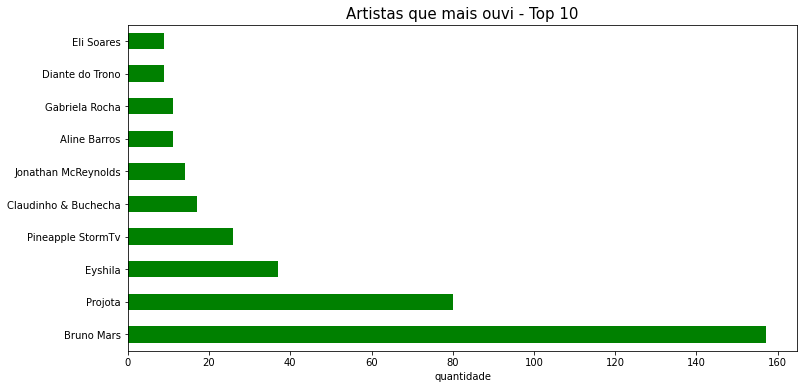

In [65]:
# Top 10 de Artistas que mais ouvi

artista = data_spotify['artistName'].value_counts().head(10)
artista.plot(kind='barh', figsize=(12,6), grid = False, rot=0, color="green")
plt.title('Artistas que mais ouvi - Top 10',size=15)
plt.xlabel('quantidade',size=10)

Text(0.5, 0, 'quantidade')

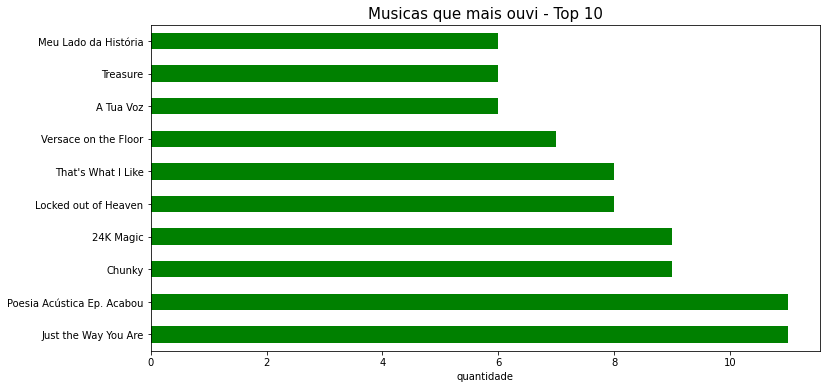

In [66]:
# Top 10 das músicas que mais ouvi
musica = data_spotify['trackName'].value_counts().head(10)
musica.plot(kind='barh', figsize=(12,6), grid = False, rot=0, color="green")
plt.title('Musicas que mais ouvi - Top 10',size=15)
plt.xlabel('quantidade',size=10)

In [67]:
data_spotify = data_spotify.reset_index()
data_spotify.head()

,index,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,diaSemana,tempoEscutado(h),tempoEscutado(min)
0,0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,03:47:00,3,Thursday,0.0471,2.8241
1,1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,03:49:00,3,Thursday,0.0367,2.2027
2,2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,03:52:00,3,Thursday,0.0385,2.3073
3,3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,03:54:00,3,Thursday,0.0407,2.4405
4,4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,03:57:00,3,Thursday,0.0427,2.5611


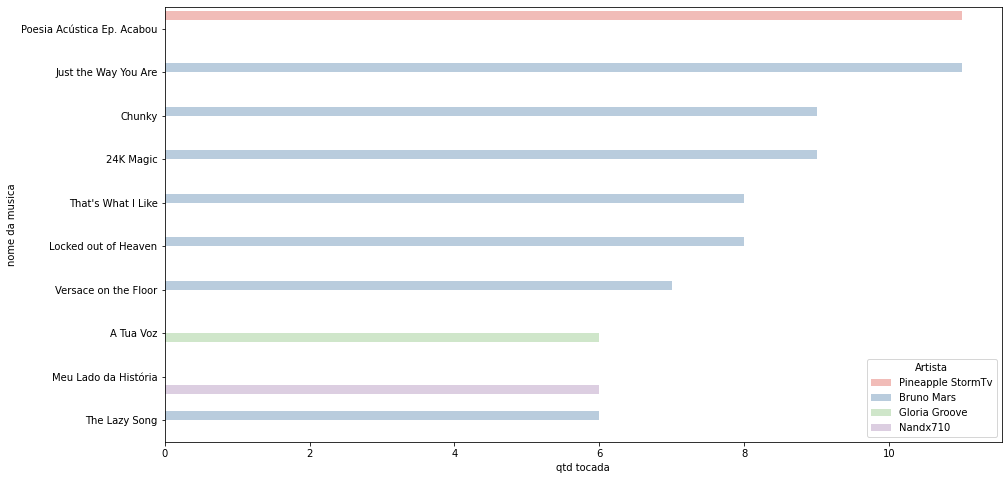

In [68]:
# Quantidade de vezes que a musica tocou separado por artista e musica
musica_artista = data_spotify[['artistName','trackName','index']].groupby(['artistName','trackName'],as_index=False).agg({'index':'count'}).reset_index()
musica_artista.drop(columns=['level_0'],inplace=True)
musica_artista.columns = ['Artista', 'nome da musica', 'qtd tocada']
musica_artista = musica_artista.sort_values(by='qtd tocada',ascending=False).head(10)

sns.barplot(x="qtd tocada", y="nome da musica", data=musica_artista, hue="Artista",palette='Pastel1' )

In [70]:
tempo_total = data_spotify['tempoEscutado(h)'].sum()
print(f'Tempo que utilizei o spotify: {tempo_total} horas')

Tempo que utilizei o spotify: 65.4518 horas


Text(0, 0.5, '')

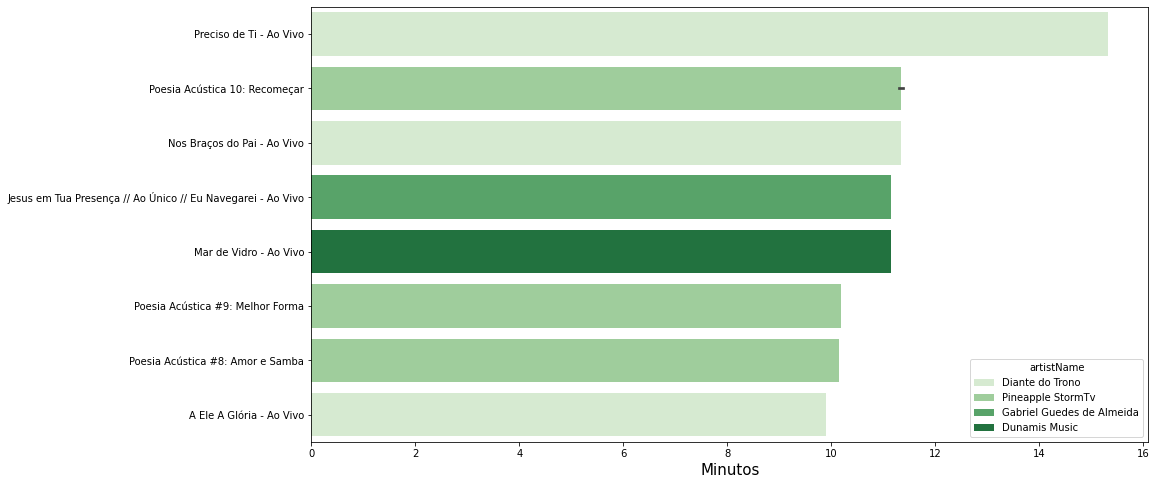

In [69]:
#maiores tempos de musica em minutos 
maiores_tempos_musica = data_spotify[['artistName','trackName','tempoEscutado(min)']].sort_values(by='tempoEscutado(min)',ascending=False)
maiores_tempos_musica = maiores_tempos_musica.drop_duplicates().head(10).reset_index()
maiores_tempos_musica = maiores_tempos_musica.drop(columns='index')
plt.rcParams["figure.figsize"] = (15,8)
sns.barplot(x="tempoEscutado(min)", y="trackName", data=maiores_tempos_musica, hue="artistName",palette='Greens',dodge=False)
plt.xlabel('Minutos',size=15)
plt.ylabel('')


In [71]:
data_spotify.head()

,index,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,diaSemana,tempoEscutado(h),tempoEscutado(min)
0,0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,03:47:00,3,Thursday,0.0471,2.8241
1,1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,03:49:00,3,Thursday,0.0367,2.2027
2,2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,03:52:00,3,Thursday,0.0385,2.3073
3,3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,03:54:00,3,Thursday,0.0407,2.4405
4,4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,03:57:00,3,Thursday,0.0427,2.5611


Text(0, 0.5, '')

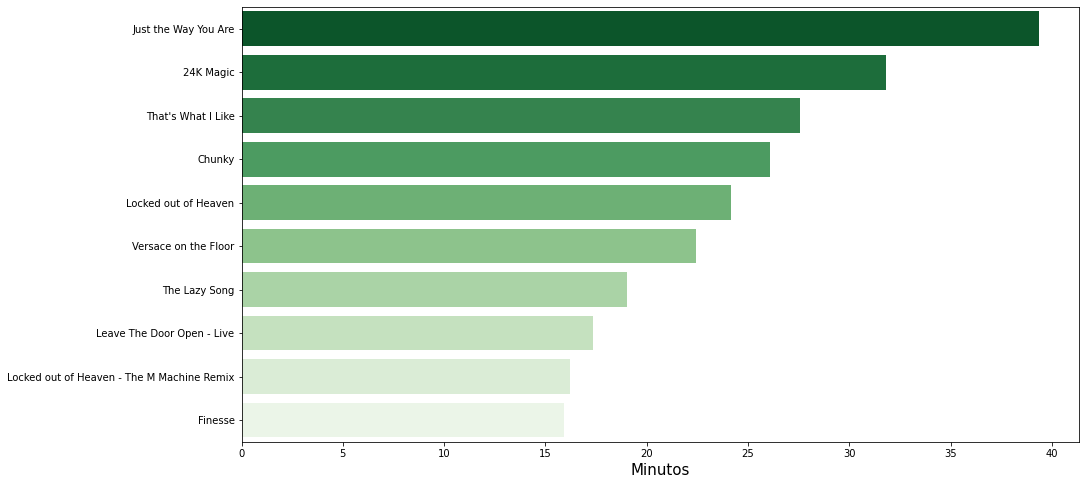

In [72]:
# Escolhendo o artista que mais escuto, verificar o quanto escutei em minutos por musica
df_BrunoMars = data_spotify.loc[data_spotify['artistName'] == 'Bruno Mars'] 
df_BrunoMars = df_BrunoMars.groupby('trackName').agg({'tempoEscutado(min)': 'sum'}).reset_index().sort_values(by='tempoEscutado(min)',ascending=False).head(10)
plt.rcParams["figure.figsize"] = (15,8)
sns.barplot(x="tempoEscutado(min)", y="trackName", data=df_BrunoMars,palette='Greens_r',dodge=False)
plt.xlabel('Minutos',size=15)
plt.ylabel('')

In [73]:
# Tempo total em minutos 
data_spotify['tempoEscutado(min)'].sum()

3927.172

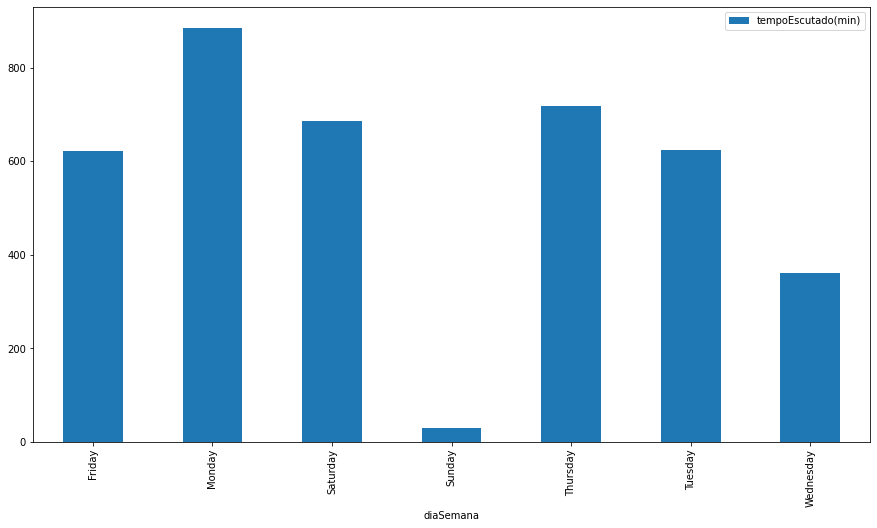

In [74]:
#Dias da semana tempo escutado em cada dia
data_spotify.groupby(['diaSemana']).agg({'tempoEscutado(min)':'sum'}).plot(kind='bar')

In [75]:
data_spotify

,index,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,diaSemana,tempoEscutado(h),tempoEscutado(min)
0,0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,03:47:00,3,Thursday,0.0471,2.8241
1,1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,03:49:00,3,Thursday,0.0367,2.2027
2,2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,03:52:00,3,Thursday,0.0385,2.3073
3,3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,03:54:00,3,Thursday,0.0407,2.4405
4,4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,03:57:00,3,Thursday,0.0427,2.5611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,1140,2021-07-15 16:51:00,KLB,A Dor Desse Amor,185278,2021,7,15,16:51:00,16,Thursday,0.0515,3.0880
1137,1141,2021-07-15 16:55:00,Katy Perry,Firework,227882,2021,7,15,16:55:00,16,Thursday,0.0633,3.7980
1138,1142,2021-07-15 17:00:00,Nelly Furtado,Promiscuous,242278,2021,7,15,17:00:00,17,Thursday,0.0673,4.0380
1139,1143,2021-07-16 15:15:00,Bruno Mars,24K Magic,225978,2021,7,16,15:15:00,15,Friday,0.0628,3.7663


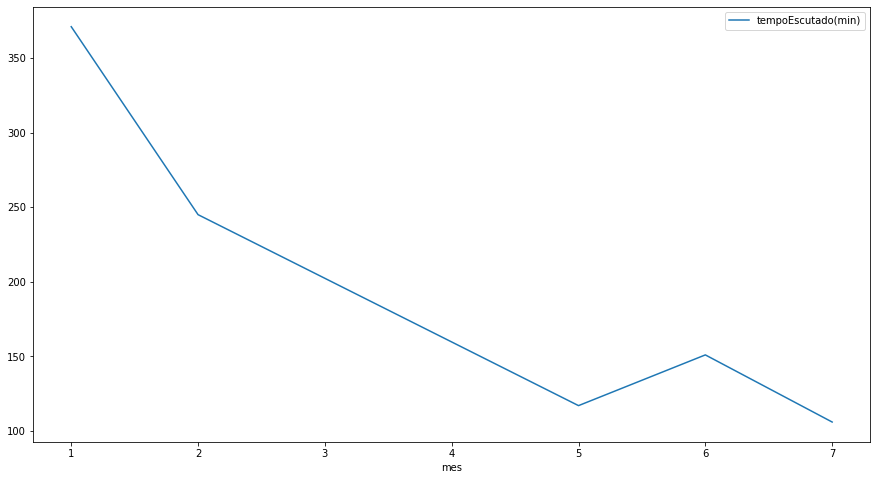

In [76]:
# tempo escutado em minutos ao longo de 2021
datas = data_spotify.groupby(['mes','ano'],as_index=False).agg({'tempoEscutado(min)':'count'}).reset_index().drop(columns='index')
datas = datas.loc[datas['ano'] == 2021]
datas.plot(kind='line',x='mes',y='tempoEscutado(min)')
# datas

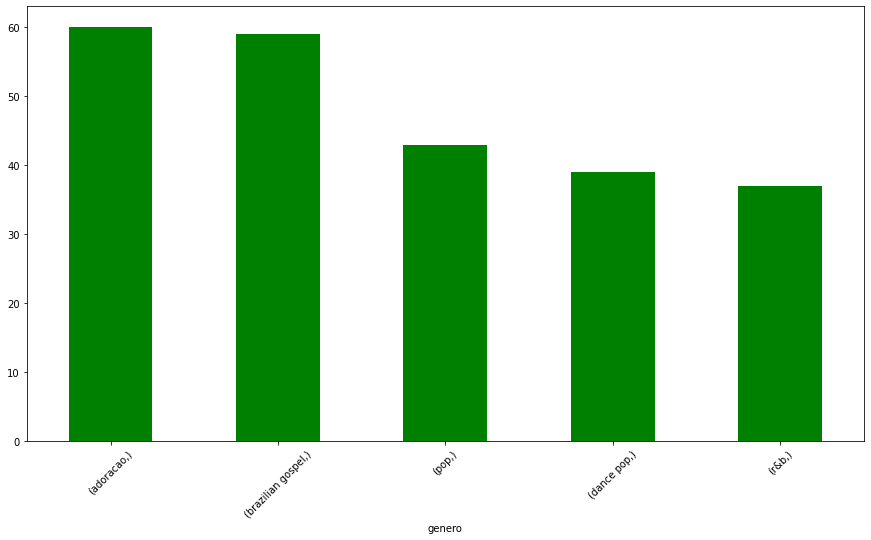

In [77]:
# Gêneros
data_genero = pd.DataFrame(data_genero)
data_genero.value_counts().head(5).plot(kind='bar',rot=45,color='green')

In [78]:
data_spotify.head()

,index,endTime,artistName,trackName,msPlayed,ano,mes,dia,tempo,horas,diaSemana,tempoEscutado(h),tempoEscutado(min)
0,0,2020-12-03 03:47:00,Ian Wong,Voices from the Sky,169447,2020,12,3,03:47:00,3,Thursday,0.0471,2.8241
1,1,2020-12-03 03:49:00,Limelight Glow,Sunshine - Cello Version,132162,2020,12,3,03:49:00,3,Thursday,0.0367,2.2027
2,2,2020-12-03 03:52:00,LUCHS,Red Gold Yesterday,138440,2020,12,3,03:52:00,3,Thursday,0.0385,2.3073
3,3,2020-12-03 03:54:00,Ian Wong,Winter Dreams,146428,2020,12,3,03:54:00,3,Thursday,0.0407,2.4405
4,4,2020-12-03 03:57:00,Slow Rising Hope,Momentum,153667,2020,12,3,03:57:00,3,Thursday,0.0427,2.5611


In [79]:
#Popularidade dos cantores da minha lista top 30
data_info_artista[['nome','popularidade']].sort_values(by='popularidade',ascending=False).head(10)

,nome,popularidade
294,Justin Bieber,98
233,Ariana Grande,96
428,Ed Sheeran,95
430,Dua Lipa,95
427,Eminem,94
130,Billie Eilish,94
220,Kanye West,93
398,Bruno Mars,93
270,Rihanna,92
73,Maroon 5,91


In [86]:
data_spotify.groupby(['artistName'],as_index=False).agg({'tempoEscutado(min)':'sum'}).sort_values(by='tempoEscutado(min)',ascending=False).reset_index().drop(columns='index')

,artistName,tempoEscutado(min)
0,Bruno Mars,502.5871
1,Projota,271.3778
2,Eyshila,169.8520
3,Pineapple StormTv,149.0768
4,Diante do Trono,91.8578
...,...,...
435,Onze:20,0.0000
436,Mateus Asato,0.0000
437,Adele,0.0000
438,Skank,0.0000


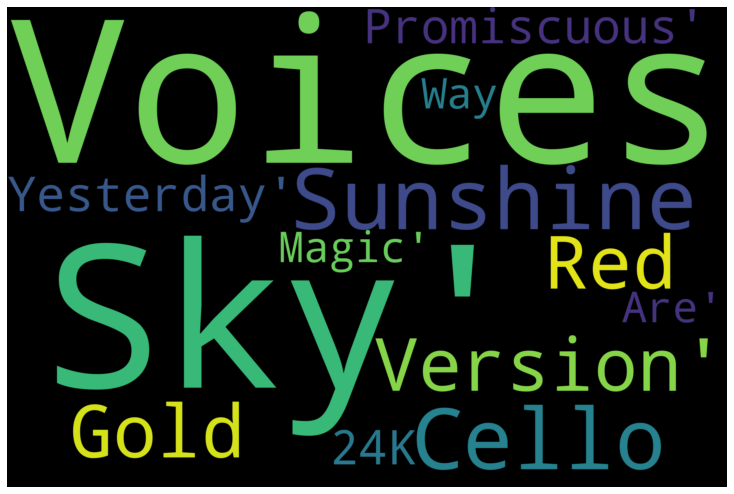

In [103]:
#nuvem de palavras das musicas
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data_spotify.trackName.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# O restante da visualização e exploração foi feita no Tableau.